In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import f_oneway, levene


Question 1

In [ ]:
# loading the data
signal1 = pd.read_csv('signal1.csv', header=None).squeeze()
signal2 = pd.read_csv('signal2.csv', header=None).squeeze()
signal3 = pd.read_csv('signal3.csv', header=None).squeeze()

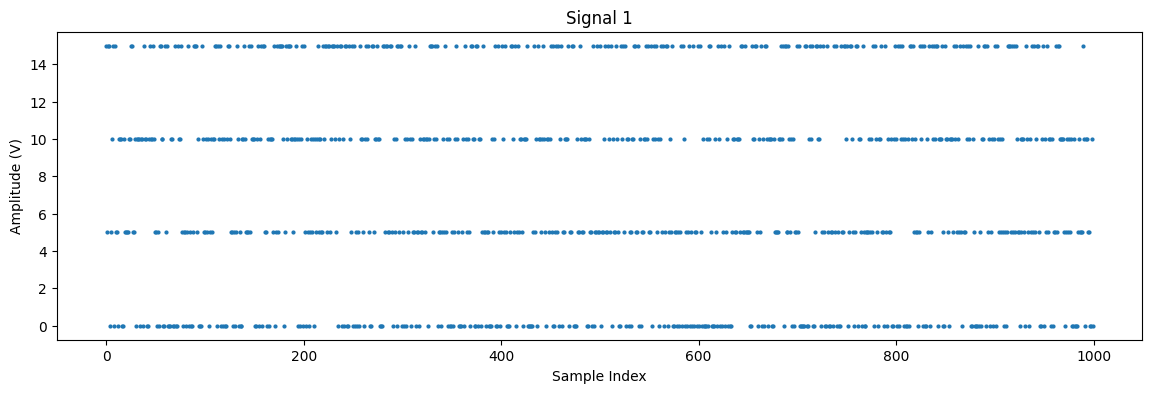

Range of signal 1 : 15.0
min jumps between points: 5.0
N of bit: 1.584962500721156


In [34]:
## Signal 1 
#ploting
plt.figure(figsize=(14, 4))
plt.plot(signal1, 'o',markersize=2)
plt.title('Signal 1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (V)')
plt.show()

#calculting the range : max-min 
range1 = signal1.max() - signal1.min()
#print(f"signal1:\n max:{signal1.max()} \n min:{signal1.min()}\n Range: {signal1.max() - signal1.min()}")
#min step for best resolution
diffs = np.diff(signal1)
diffs = np.abs(diffs[diffs != 0])
min_step1 = diffs.min()
# using the formula to calculate the N bits
nbits1 = math.log2(range1 / min_step1)

print (f"Range of signal 1 : {range1}\nmin jumps between points: {min_step1}\nN of bit: {nbits1}")



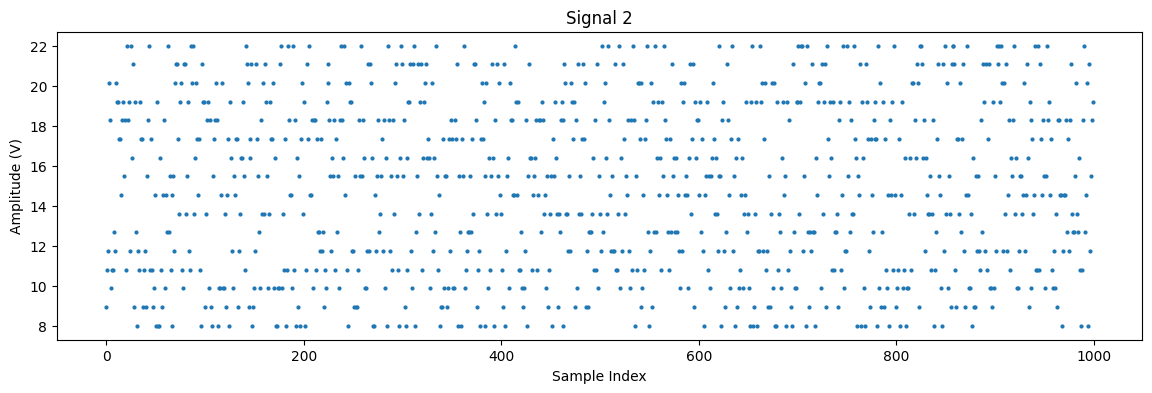

Range of signal 2 : 14.0
min jumps between ponts: 0.93333333333333
N of bit: 3.9068905956085236


In [35]:
## Signal 2
#ploting
plt.figure(figsize=(14, 4))
plt.plot(signal2, 'o',markersize=2)
plt.title('Signal 2')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (V)')
plt.show()
#calculting the range : max-min 
range2 = signal2.max() - signal2.min()
#min step for best resolution
diffs = np.diff(signal2)
diffs = np.abs(diffs[diffs != 0])
min_step2 = diffs.min()
# using the formula to calculate the N bits
nbits2 = math.log2(range2 / min_step2)

print (f"Range of signal 2 : {range2}\nmin jumps between ponts: {min_step2}\nN of bit: {nbits2}")


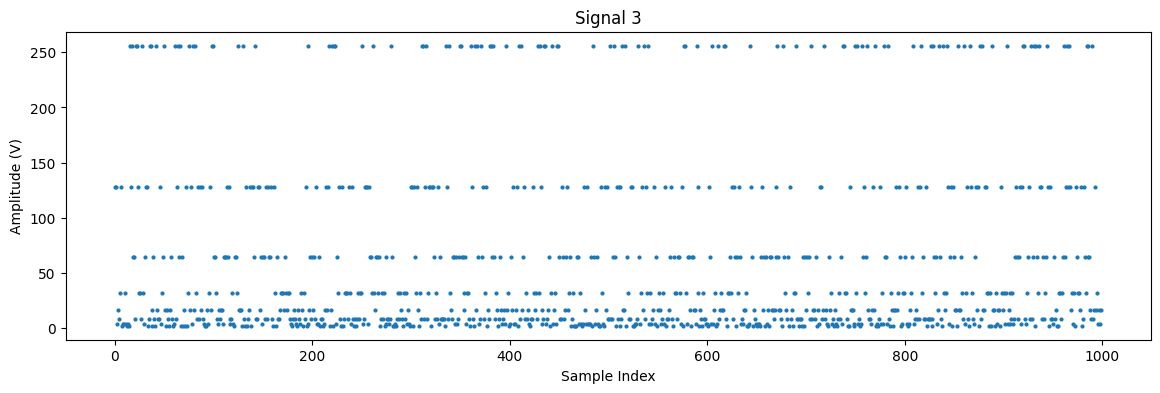

Range of signal 3 : 254.0
min jumps between ponts: 2.0
N of bit: 6.9886846867721655


In [36]:
## Signal 3
#ploting
plt.figure(figsize=(14, 4))
plt.plot(signal3, 'o',markersize=2)
plt.title('Signal 3')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (V)')
plt.show()
#calculting the range : max-min 
range3 = signal3.max() - signal3.min()
#min step for best resolution
diffs = np.diff(signal3)
diffs = np.abs(diffs[diffs != 0])
min_step3 = diffs.min()
# using the formula to calculate the N bits
nbits3 = math.log2(range3 / min_step3)

print (f"Range of signal 3 : {range3}\nmin jumps between ponts: {min_step3}\nN of bit: {nbits3}")


Final Answer 1:
signal 1 is range 15 and resolution of 5V because the min diff between points is 5 of this will Suffice the capture all the details of the data.
nbits=log2 (range/resolution)
nbits=log2 (15/5) = 1.58 ~ 2

signal 2 is range 14 and resolution of 0.9V because the min diff between points is 5 of this will Suffice the capture all the details of the data.
nbits=log2 (range/resolution)
nbits=log2 (14/0.9) = 3.9 ~ 4

signal 3 is range 254 and resolution of 2V because the min diff between points is 5 of this will Suffice the capture all the details of the data.
nbits=log2 (range/resolution)
nbits=log2 (254/2) = 6.98 ~ 7


Question 2

In [37]:
eeg1 = pd.read_csv('eeg1.csv', header=None)
eeg2 = pd.read_csv('eeg2.csv', header=None)
eeg3 = pd.read_csv('eeg3.csv', header=None)


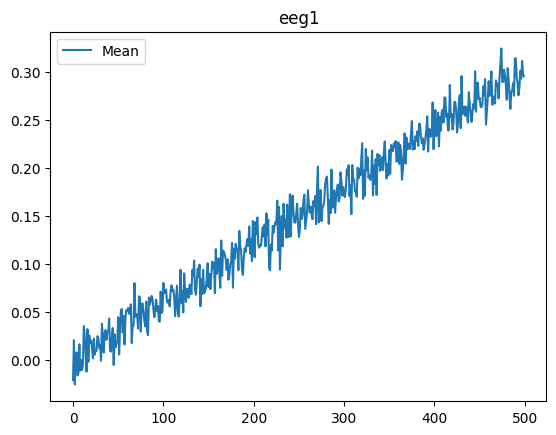

In [38]:
mean_over_time = eeg1.mean(axis=0)

plt.plot(mean_over_time, label='Mean')
plt.legend()
plt.title('eeg1')
plt.show()



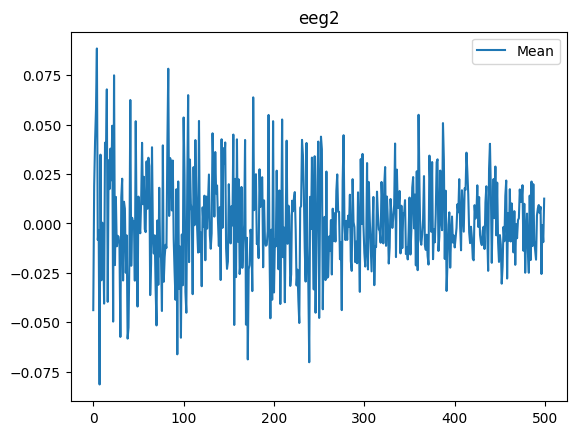

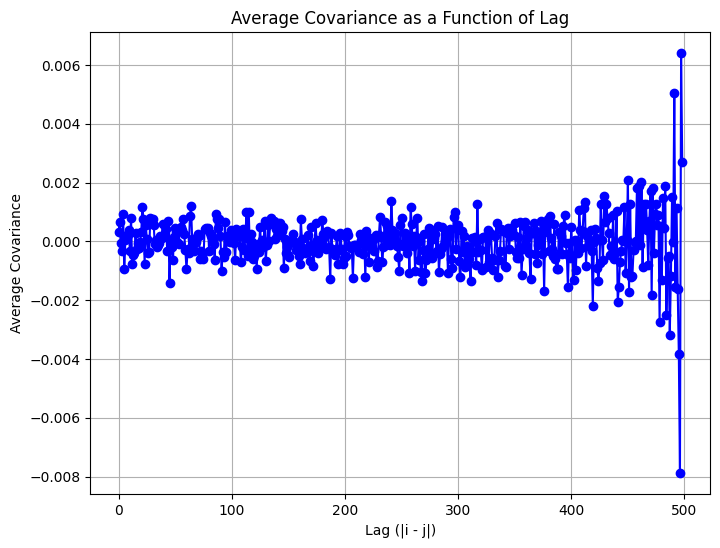

In [39]:
mean_over_time = eeg2.mean(axis=0)

plt.plot(mean_over_time, label='Mean')
plt.legend()
plt.title('eeg2')
plt.show()

data = eeg2
cov_matrix = np.cov(data, rowvar=False)  # shape: (n_timepoints, n_timepoints)

# Calculate the average covariance for each lag.
n_timepoints = cov_matrix.shape[0]
max_lag = n_timepoints - 1
avg_covariances = []

for lag in range(max_lag + 1):
    # Extract the diagonal corresponding to the given lag.
    diag = np.diagonal(cov_matrix, offset=lag)
    # The average of the diagonal elements gives the covariance for this lag.
    avg_cov = np.mean(diag)
    avg_covariances.append(avg_cov)

avg_covariances = avg_covariances[1:]
# Plot the average covariance vs. lag.
plt.figure(figsize=(8, 6))
plt.plot(range(max_lag), avg_covariances, marker='o', linestyle='-', color='blue')
plt.title('Average Covariance as a Function of Lag')
plt.xlabel('Lag (|i - j|)')
plt.ylabel('Average Covariance')
plt.grid(True)
plt.show()




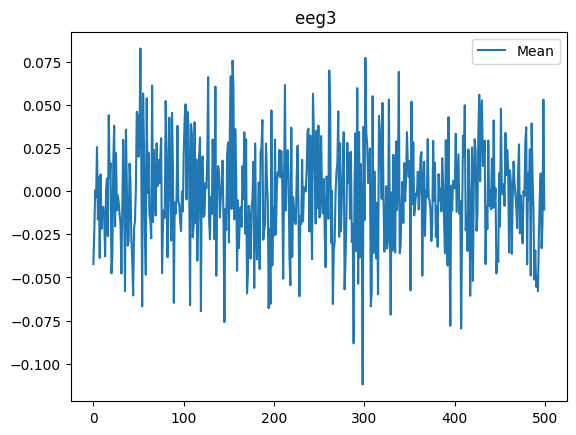

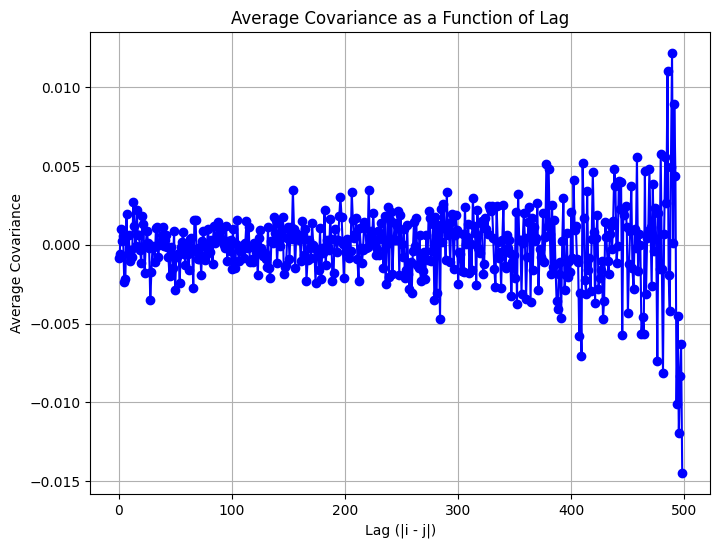

In [40]:
mean_over_time = eeg3.mean(axis=0)

plt.plot(mean_over_time, label='Mean')
plt.legend()
plt.title('eeg3 ')
plt.show()

data = eeg3
cov_matrix = np.cov(data, rowvar=False)  # shape: (n_timepoints, n_timepoints)

# Calculate the average covariance for each lag.
n_timepoints = cov_matrix.shape[0]
max_lag = n_timepoints - 1
avg_covariances = []

for lag in range(max_lag + 1):
    # Extract the diagonal corresponding to the given lag.
    diag = np.diagonal(cov_matrix, offset=lag)
    # The average of the diagonal elements gives the covariance for this lag.
    avg_cov = np.mean(diag)
    avg_covariances.append(avg_cov)

avg_covariances = avg_covariances[1:]
# Plot the average covariance vs. lag.
plt.figure(figsize=(8, 6))
plt.plot(range(max_lag), avg_covariances, marker='o', linestyle='-', color='blue')
plt.title('Average Covariance as a Function of Lag')
plt.xlabel('Lag (|i - j|)')
plt.ylabel('Average Covariance')
plt.grid(True)
plt.show()


2. b

In [41]:
#EEG2
time_avg_trial0 = eeg2.iloc[0, :].mean()
ensemble_avg = eeg2.values.flatten().mean()
print("EEG2:")
print(f"Time‐average of one trail: {time_avg_trial0:.4f}")
print(f"Ensemble average:        {ensemble_avg:.4f}")

#EEG3
time_avg_trial0 = eeg3.iloc[0, :].mean()
ensemble_avg = eeg3.values.flatten().mean()
print("EEG3:")
print(f"Time‐average of one trail: {time_avg_trial0:.4f}")
print(f"Ensemble average:        {ensemble_avg:.4f}")



EEG2:
Time‐average of one trail: 0.0024
Ensemble average:        0.0007
EEG3:
Time‐average of one trail: 0.0019
Ensemble average:        -0.0020


Both eeg2 and eeg3 are not ergodic

Question3

In [42]:
# Part 3a
#Number of Spikes/Total time
spike_times= pd.read_csv('spk_times.csv', header=None)
num_spikes=spike_times.shape[1]
time=10
print(f"mean firing rate: {num_spikes/time}")


mean firing rate: 32.7


In [43]:
# 3b
T = 10.0
dt_bin = 0.001            # 1 ms
n_bins = int(T / dt_bin)  #10000
spike_train = np.zeros(n_bins, dtype=int)
spike_time_in_ms=np.floor(spike_times/dt_bin).astype(int)
spike_train[spike_time_in_ms]=1
print(spike_train)

[0 0 0 ... 0 0 0]


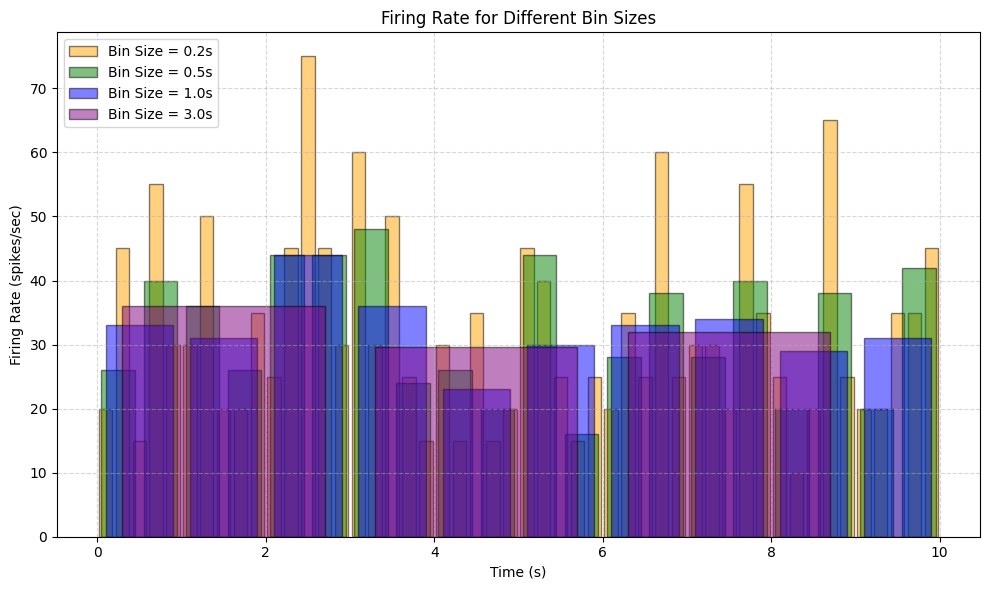

In [44]:
T = 10.0
dt_bin = 0.001  # 1 ms
n_bins = int(T / dt_bin)
bin_sizes = [0.2, 0.5, 1.0, 3.0]
colors = ['orange', 'green', 'blue', 'purple']

# Set up one subplot
fig, ax = plt.subplots(figsize=(10, 6))

for i, bin_size in enumerate(bin_sizes):
    window_size_in_bins = int(bin_size / dt_bin)
    counts = []

    for start in range(0, len(spike_train), window_size_in_bins):
        end = start + window_size_in_bins
        if end > len(spike_train):
            break
        rate = spike_train[start:end].sum() / bin_size
        counts.append(rate)

    bin_centers = [(b + 0.5) * bin_size for b in range(len(counts))]
    
    ax.bar(bin_centers, counts, width=bin_size * 0.8, color=colors[i],
           alpha=0.5, edgecolor='black', label=f"Bin Size = {bin_size}s")

# Labels and design
ax.set_xlabel("Time (s)")
ax.set_ylabel("Firing Rate (spikes/sec)")
ax.set_title("Firing Rate for Different Bin Sizes")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


3C

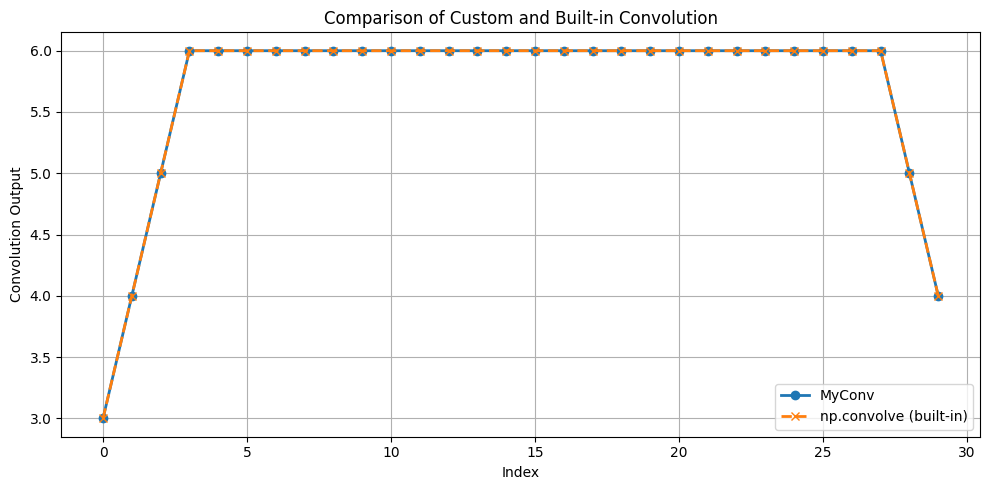

In [45]:
def MyConv(x, h):
    N = len(x)                   
    M = len(h)                   
    y = []                       
    #flipped the filter
    h= h[::-1]          
    pad = M // 2                 
    x_padded = np.pad(x, (pad, pad), mode='constant')  # Pad the signal with zeros to make space

    for i in range(N):           
        value = 0
        for j in range(M):       
            value += x_padded[i + j] * h[j]
        y.append(value)          

    return np.array(y)           


#test my function:
x = np.ones(30) #crating function
h = np.ones(6)  # Rectangular window of length 6

y_myfunc = MyConv(x, h)
y_builtin = np.convolve(x, h, mode='same')

#Plot the comparison
plt.figure(figsize=(10, 5))
plt.plot(y_myfunc, 'o-', label='MyConv', linewidth=2)
plt.plot(y_builtin, 'x--', label='np.convolve (built-in)', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Convolution Output')
plt.title('Comparison of Custom and Built-in Convolution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Question3 d

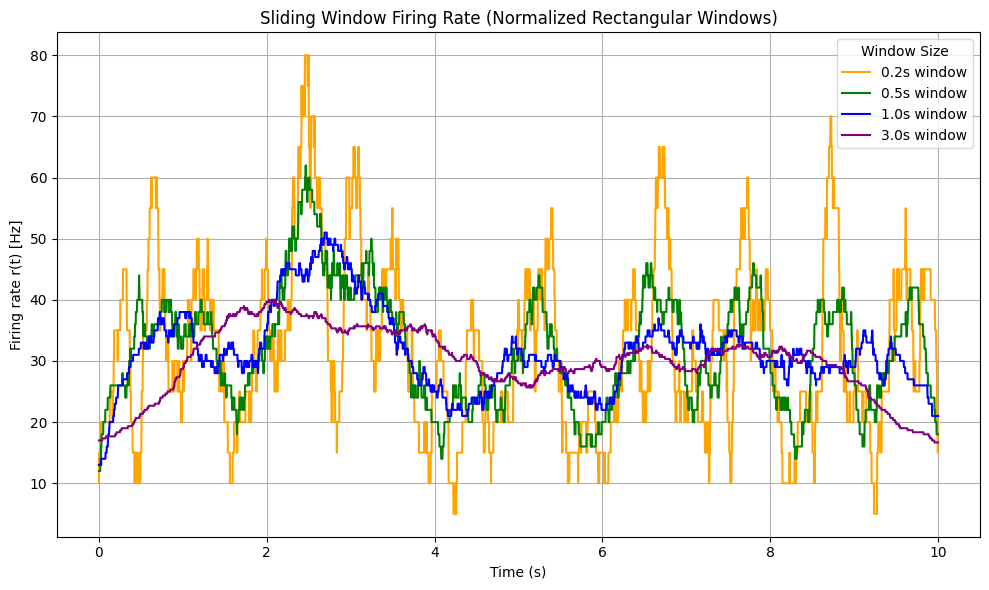

In [46]:
T = 10.0
dt = 0.001  # 1 ms
n_bins = int(T / dt)  # 10,000
bin_sizes = [0.2, 0.5, 1.0, 3.0]  # in seconds
colors = ['orange', 'green', 'blue', 'purple']

plt.figure(figsize=(10, 6))

for i, bin_size in enumerate(bin_sizes):
    window_size_bins = int(bin_size / dt) #[200,500,1000,3000]
    window = np.ones(window_size_bins) / bin_size #all values sum up to 1

    r_t = np.convolve(spike_train, window, mode='same')  # firing rate estimate

    time = np.arange(n_bins) * dt  # time axis in seconds 

    plt.plot(time, r_t, color=colors[i], label=f'{bin_size}s window')

plt.xlabel('Time (s)')
plt.ylabel('Firing rate r(t) [Hz]')
plt.title('Sliding Window Firing Rate (Normalized Rectangular Windows)')
plt.legend(title='Window Size')
plt.grid(True)
plt.tight_layout()
plt.show()


Question 3 E

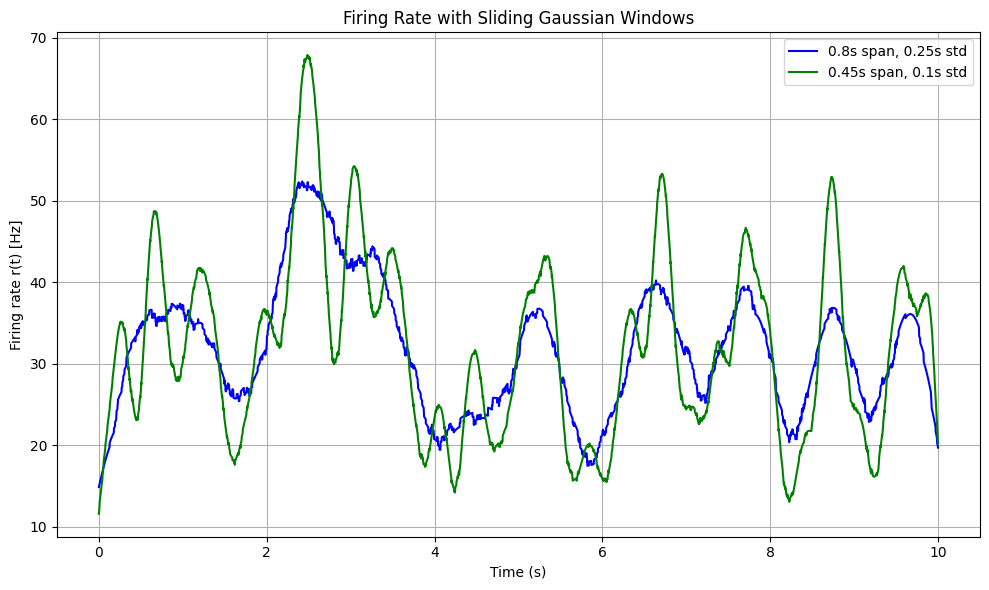

In [47]:
T = 10.0
dt = 0.001
n_bins = int(T / dt)
time = np.arange(n_bins) * dt  # time axis in seconds
params = [
    {"span": 0.8, "std": 0.25, "color": "blue", "label": "0.8s span, 0.25s std"},
    {"span": 0.45, "std": 0.1,  "color": "green", "label": "0.45s span, 0.1s std"}
]

plt.figure(figsize=(10, 6))

for p in params:
    span_bins = int(p["span"] / dt)
    std_bins = p["std"] / dt

    # Create symmetric time axis for kernel: e.g., -400ms to +400ms
    t_kernel = np.linspace(-p["span"]/2, p["span"]/2, span_bins)
    
    # Gaussian formula: exp(-t^2 / (2*std^2))
    gaussian = np.exp(-t_kernel**2 / (2 * p["std"]**2))
    gaussian = gaussian / np.sum(gaussian * dt)  # normalize area to 1

    # Convolve with spike train
    r_t = np.convolve(spike_train, gaussian, mode='same')

    # Plot the result
    plt.plot(time, r_t, label=p["label"], color=p["color"])

plt.xlabel("Time (s)")
plt.ylabel("Firing rate r(t) [Hz]")
plt.title("Firing Rate with Sliding Gaussian Windows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


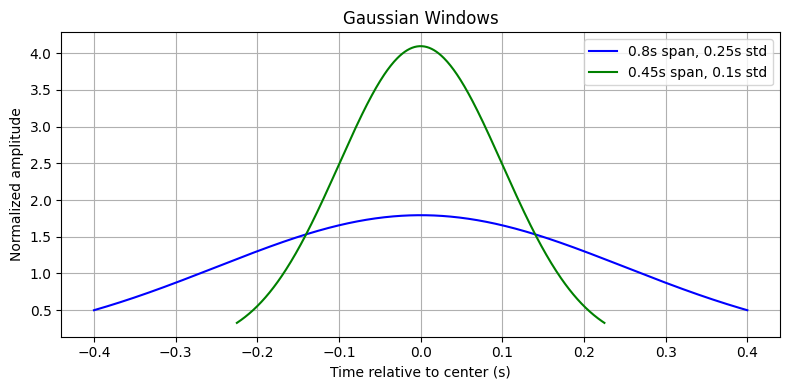

In [48]:
plt.figure(figsize=(8, 4))

for p in params:
    span_bins = int(p["span"] / dt)
    t_kernel = np.linspace(-p["span"]/2, p["span"]/2, span_bins)
    std_bins = p["std"] / dt

    gaussian = np.exp(-t_kernel**2 / (2 * p["std"]**2))
    gaussian = gaussian / np.sum(gaussian * dt)

    plt.plot(t_kernel, gaussian, label=p["label"], color=p["color"])

plt.xlabel("Time relative to center (s)")
plt.ylabel("Normalized amplitude")
plt.title("Gaussian Windows")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
